# Исследование для интернет-магазина игр

Заказчик - Интернет-магазин игр. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель исследования**

Выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года.

**Описание данных** 

Данные о продажах содержатся в файле `/datasets/games.csv`

Данные за 2016 год могут быть неполными. Столбцы в таблице:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board)

Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», или «Для подростков» и т.д.

**Ход исследования:**

О качестве данных ничего не известно, поэтому перед исследованием понадобится обзор данных. На этапе подготовки нужно будет проверить данные на наличие пропусков, проверить типы данных в столбцах, исправить нарушения стиля, а также произвести необходимые расчеты и добавить их в таблицу. Затем провести исследовательский анализ данных и выявить закономерности, определяющие успешность игры. Далее мы проверим гипотезы и сформулируем общий вывод.

Таким образом, исследование пройдёт в 5 этапов:

1. Обзор данных.
2. Подготовка данных.
3. Исследовательский анализ данных.
4. Выявление закономерностей успешности игры.
5. Проверка гипотез.
6. Общий вывод.

## 1. Обзор данных
### 1.1 Импорт библиотек

В первую очередь импортируем необходимые для исследования библиотеки.

In [1]:
import numpy as np # импорт библиотеки numpy
import pandas as pd # импорт библиотеки pandas
from scipy import stats as st # импорт библиотеки stats
import matplotlib.pyplot as plt # импорт библиотеки matplotlib

### 1.2 Изучение данных из файла

Сохраним полученные данные из файла `games.csv` в переменную `df` и выведем таблицу на экран первые 5 строк для ознакомления с данными.

In [2]:
df = pd.read_csv('/datasets/games.csv') # сохранение таблицы в переменную   
display(df.head()) # вывод первых 5 строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Данные отображаются корректно, посмотрим на структуру данных более детально с помощью метода `info()`.

In [3]:
df.info() # информация о структуре таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 ### 1.3 Вывод
 
 После обзора данных были обнаружены проблемы, которые нужно решить на этапе предобработки:
 1. Исправить названия столбцов, так как нарушен стиль.
 2. Преобразовать данные в стоблцах в нужные типы.
 3. По возможности избавиться от пропущенных значений.

## 2. Подготовка данных
### 2.1 Предобработка

Начнем с изменения названия столбцов. Названия уже записаны в змеином регистре, нужно только привести их к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower() # приведение названия столбцов к нижнему регистру
df.columns # вывод на экран названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посчитаем процент пропусков в каждом столбце от всего датасета.

In [5]:
df.isna().mean() * 100 # подсчет процента значения пропусков в столбцах

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

В столбцах `name` и `year_of_release` пропущенных значений в сумме менее 2% от всего датасета, поэтому можно удалить строки полностью.

In [6]:
df = df.dropna(subset=['name', 'year_of_release']) # удаление строк с пропусками

В `year_of_release` поменяем тип данных с `float` на `int`, так как годы - это целочисленные значения. Сделаем преобразование в `user_score`, который содержит вещественные значения, поменяем тип данных с `object` на `float`. Повторно проверим процент пропусков в столбцах.

In [7]:
df['year_of_release'] = df['year_of_release'].astype('int') # замена типа данных
df['user_score'] = df['user_score'].replace('tbd', np.nan) # замена значения на NaN
df['user_score'] = df['user_score'].astype('float') # замена типа данных
df.isna().mean() * 100 # подсчет процента пропусков

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

При попытке поменять тип данных в `user_score`, возникала ошибка ***ValueError: could not convert string to float: 'tbd'***

Аббревиатура **tbd** расшифровывается как "to be determined", что переводится как "будет опредлен позже", то есть рейтинг еще не определен. Мы заменили эти ячейки пропусками, чтобы в дальнейшем решить вопрос уже со всеми пропусками. При повторном запуске функции `replace`, ошибки не возникло.Сейчас типы данных соответствуют данным в ячейках. 

Осталось большое количество пропусков в столбцах `critic_score` и `user_score `. Заполним пропуски оценок, взяв значения таких же игр, но на других платформах, у которых оценки не пропущены.

In [8]:
df['critic_score'] = df['critic_score'].fillna(df.groupby('name')['critic_score'].transform('median')) # замены пропусков
df['user_score'] = df['user_score'].fillna(df.groupby('name')['user_score'].transform('median'))  # по медиане

df.isna().mean() * 100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       45.743128
user_score         48.163464
rating             40.598395
dtype: float64

Удалось заполнить 6% пропусков в столбцах. Для исследования потребуются точные данные этих столбцов. Так как нет способа, который корректно заменил бы пропущенные значения, то оставим их без изменений.

Рассмотрим пропуски в столбце `rating`. Организация ESRB определяет рейтинг для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Посмотрим для каких платформ больше всего пропусков, выведем первые 10 строк таблицы.

In [9]:
df[df['rating'].isna()].pivot_table(
    index='platform', values='name', aggfunc='count').sort_values(
    by='name', ascending=False).head(10)

,name
platform,
PS,986
DS,866
PS2,671
PSP,657
PS3,371
N64,316
Wii,309
GBA,297
3DS,289


Все платформы разработаны в Японии. Вероятно это означает, что пропуски обусловлены локальным рынком. Укажем, что рейтинг не определен.

In [10]:
df['rating'] = df['rating'].fillna('unknown')

Проерим датасет на наличие явных дубликатов.

In [11]:
df.duplicated().sum()

0

### 2.2 Расчеты

На этом этапе нужно посчитать суммарные продажи во всех регионах и записать их в отдельный столбец. Проверим результат.

In [12]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # добавление нового столбца
display(df.head()) # вывод таблицы на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### 2.3 Вывод

На этом этап подготовки данных заканчивается. Мы исправили нарушения стиля, преобразовали типы данных и избавились от пропусков там, где это было возможно. Было удалено не более 2% данных датасета, что не окажет влияния на результаты. Также мы провели необходимые расчеты и добавили данные в таблицу.

## 3. Исследовательский анализ данных

На данном этапе нужно провести исследование и ответить на вопросы:

1. Посмотреть, сколько игр выпускалось в разные годы и выяснить важны ли данные за все периоды.


2. Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Выяснить за какой характерный срок появляются новые и исчезают старые платформы.


3. Взять данные за соответствующий актуальный период, который был определен в первых двух пунктах. Основной фактор - эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы. 


4. Выяснить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.


5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.


6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы. Соотнести выводы с продажами игр на других платформах.


7. Посмотреть на общее распределение игр по жанрам. Выяснить, что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами.

### 3.1 Cколько игр выпускалось в разные годы

Построим столбчатую диграмму и посмотрим сколько игр выпускалось в разные годы.

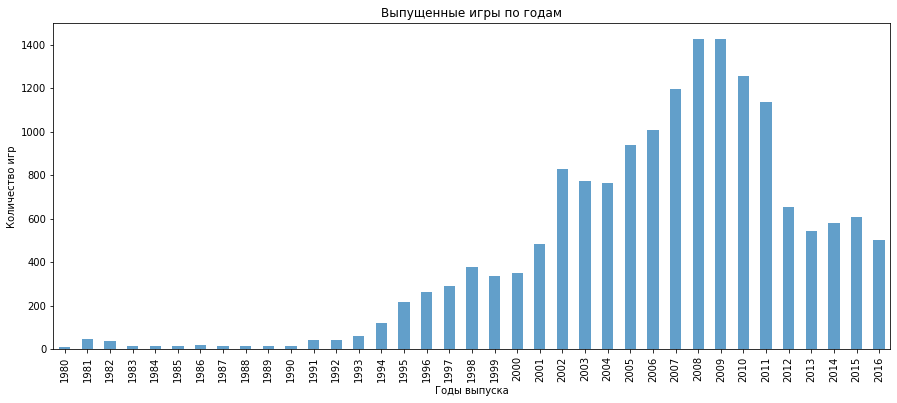

In [13]:
df.pivot_table(
    index=['year_of_release'],
    values=['name'], aggfunc='count'
).plot.bar(
    figsize=(15, 6), legend=False,
    xlabel='Годы выпуска', ylabel='Количество игр', 
    title='Выпущенные игры по годам', alpha=0.7)
plt.show(block=False)

Большинство игр выпускалось с 1995 г. по 2016 г. Определим этот период как актуальный.

### 3.2 Как менялись продажи по платформам

Сделаем сводную таблицу и построим столбчатую диаграмму, чтобы выбрать платформы с наибольшими суммарными продажами.

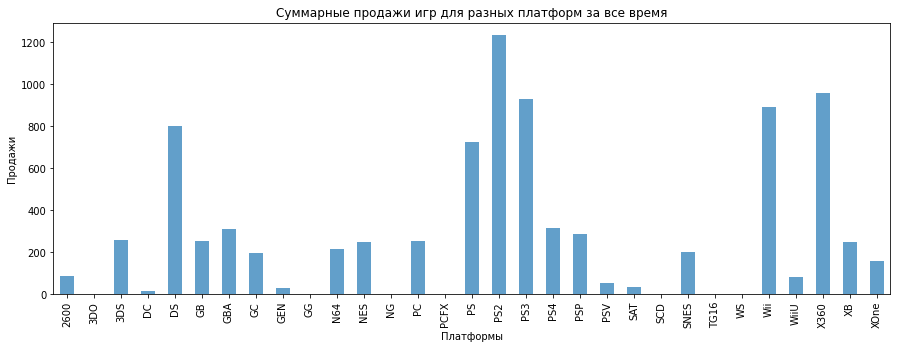

In [14]:
pl_sales = df.pivot_table( # сводная таблица
    index=['platform'],    # с группировкой 
    values=['all_sales'],  # по платформе
    aggfunc='sum'
    )

pl_sales.plot.bar(figsize=(15,5), xlabel='Платформы', ylabel='Продажи', legend=False,        # столбчатая
                  title='Суммарные продажи игр для разных платформ за все время', alpha=0.7) # диаграмма
plt.show()

Из распределения можно выделить платформы  с наибольшими суммарными продажами:
1. PS2
2. X360
3. Wii
4. PS3
5. PS
6. 3DS

Сделаем срез датасета по этим 6-ти платформам и сформируем сводную таблицу с продажами по годам для каждой из этих платформы.

In [15]:
top_pl_sales = df.query(
    'platform == ["PS2", "X360", "Wii", "PS3", "PS", "3DS"]').pivot_table( # срез по платформам
    index=['year_of_release'], columns=['platform'], values=['all_sales'], aggfunc='sum') # сводная таблица

top_pl_sales.columns = ['_'.join(col) for col in top_pl_sales.columns] # переименование столбцов и удаление мультииндекса
display(top_pl_sales)

,all_sales_3DS,all_sales_PS,all_sales_PS2,all_sales_PS3,all_sales_Wii,all_sales_X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


Построим столбчатые диаграммы, чтобы посмотреть распределение продаж игр по годам для каждой из 6-ти платформ. Так мы сможем сделать вывод о том, за какой характерный срок появляются новые и исчезают старые платформы.

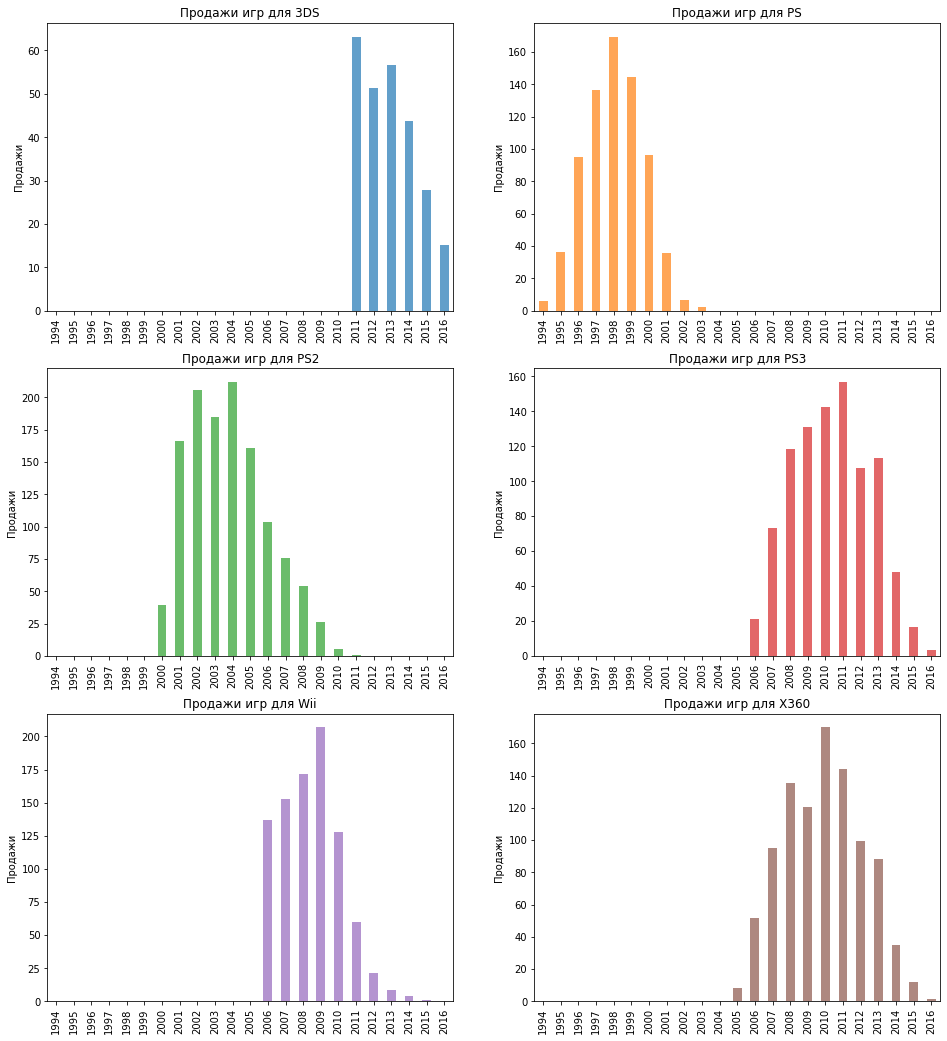

In [16]:
top_pl_sales.plot.bar(subplots=True, figsize=(16, 18), legend=False, # построение графиков
    sharex=False, xlabel='', ylabel='Продажи', alpha=0.7, layout=(3, 2),
    title=["Продажи игр для 3DS", "Продажи игр для PS", "Продажи игр для PS2",
           "Продажи игр для PS3", "Продажи игр для Wii", "Продажи игр для X360"])
plt.show()

Рассмотрим жизненный цикл платформ на примере трех поколений консолей PlayStation. Каждое новое поколение появлется через 6 лет.

* PS1 в 1994 г.
* PS2 в 2000 г.
* PS3 в 2006 г.

Пик продаж игр приходится на 4-6 год после выхода консолей на рынок. Далее продажи начинают снижаться, так как выходит новое поколение. В среднем продажи прекращаются через 10 лет после выхода консоли на рынок. Аналогичная ситуация наблюдается и с другими платформами.
### 3.3 Данные для прогноза продаж на 2017 год

На этом этапе нужно определить актуальный период. Основной фактор - эти данные помогут построить прогноз на 2017 год.

В пункте 3.2 мы выяснили, что рост продаж наблюдается в течение первых 6-ти лет после выхода платформы, далее в течение 4-5 лет наблюдается снижение продаж. Следовательно жизненный цикл составлят платформы примерно 10 лет. Актуальным периодом будем считать последние 3 года, то есть с 2014 года, предыдущие годы не будем учитывать. Посмотрим на графики количества продаж и если за последние 3 года и не было сильной тенденции к снижению, то и в 2017 продажи будут ненулевые. Сделаем срез по годам.

In [17]:
df_res = df.query('year_of_release > 2013') # срез по годам

### 3.4 Выбор прибыльных платформ
На этом этапе нужно выяснить какие платформы лидируют по продажам, растут или падают, а также выбрать потенциально прибыльные платформы. Для этого сделаем сводную таблицу с продажами за последние 3 года для каждой платформы и построим столбчатые диаграммы.

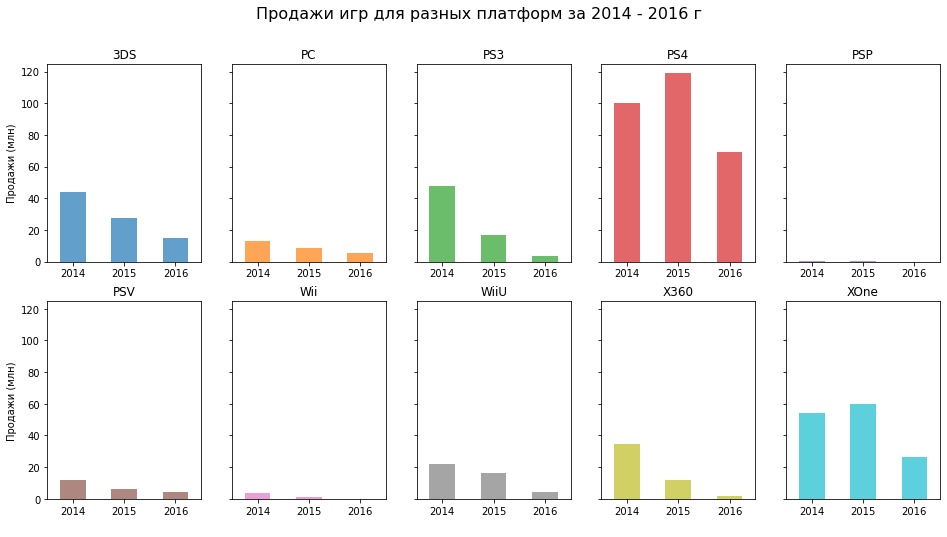

In [18]:
pl_sales = df_res.pivot_table(index=['year_of_release'], # сводная таблица
                              columns=['platform'],
                              values=['all_sales'],
                              aggfunc='sum') 

pl_sales.columns = ['_'.join(col) for col in pl_sales.columns] # переименование столбцов 
                                                               # и удаление мультииндекса

pl_list = ["3DS", "PC", "PS3", "PS4", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"] # пустой список для удаления заголовков графиков

pl_sales.plot.bar(subplots=True, rot=0, figsize=(16, 8), # построение столбчатых графиков
                  legend=False, xlabel=' ', ylabel='Продажи (млн)',
                  sharex=False, sharey=True, layout=(2, 5), alpha=0.7, title=pl_list)
plt.suptitle('Продажи игр для разных платформ за 2014 - 2016 г', fontsize=16)
plt.show()

Можно заметить, что за последние 3 года наблюдается резкое снижение продаж игр для платформ **PS3** и **X360**, а продажи игр для платформ **Wii** и **PSP** практически нулевые. Лидерами продаж являются **PS4** и **XOne**, они потенциально прибыльные. Некоторые платформы еще будут актуальны в 2017 году, продажи игр будут снижаться, но они не будут нулевыми. Эти платформы **WiiU**, **PC**,  **PSV**,  **3DS**. Все 6 платформ будут актуальными в 2017.


### 3.5 Глобальные продажи игр

Сделаем срез по потенциально прибыльным платформам и построим график «ящик с усами» по глобальным продажам игр для этих платформ.

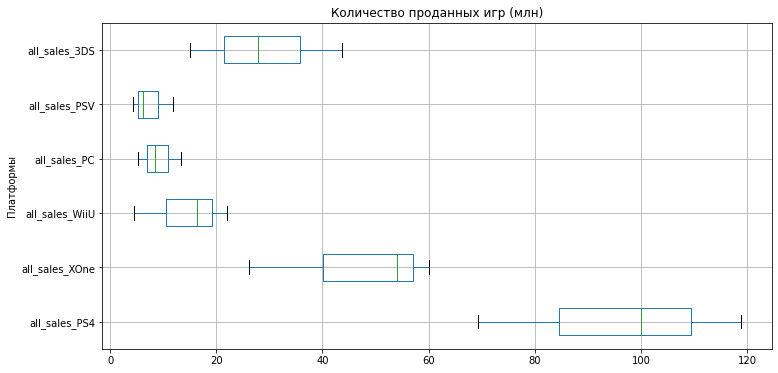

In [19]:
pl_persp = pl_sales[["all_sales_PS4", "all_sales_XOne", "all_sales_WiiU", # выбор платформ
                     "all_sales_PC", "all_sales_PSV", "all_sales_3DS"]]   # из таблицы
pl_persp.plot(kind='box', rot=0, figsize=(12, 6), grid=True, vert=False, 
              title='Количество проданных игр (млн)', ylabel='Платформы', xlabel='Игры') # ящик с усами
plt.show()

На диаграмме размаха можно увидеть существенную разницу в количестве продаж игр двух потенциально прибыльных платформ. Обе платформы **PS4** и **XOne** вышли в 2013 году, но в среднем за 4 года продажи игр для **PS4** в 2 раза превышают продажи игр для **XOne**. Третьей потенциально прибыльной платформой можно выделить **3DS**, продажи игр для остальных платформ существенно ниже.

### 3.6 Влияние отзывов на продажи игр

Посмотрим, как влияют на продажи внутри одной популярной платформы оценки пользователей и критиков. Построиим диаграмму рассеяния и посчитаем корреляцию между оценками и продажами. Рассмотрим в качестве наиболее популярной платформы **PS4**.

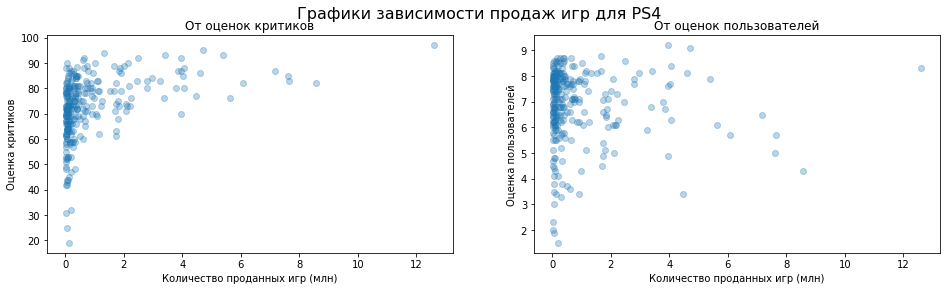

Коэффициент корреляции продаж игр для PS4 от отзывов критиков 0.39, от отзывов пользователей -0.03.


In [20]:
df_res = df_res.query('platform == ["PS4", "XOne", "WiiU", "PC", "PSV", "3DS"]') # срез по платформам

df_res_ps4 = df_res.query('platform == "PS4"') # срез по одной платформе
    
plt.figure(figsize=(16, 4)) # размер фигуры
plt.suptitle(f'Графики зависимости продаж игр для PS4', fontsize=16)

plt.subplot(1, 2, 1) # позиция первого графика
plt.scatter(x=df_res_ps4['all_sales'], y=df_res_ps4['critic_score'], alpha=0.3) # первый график
plt.xlabel('Количество проданных игр (млн)')
plt.ylabel('Оценка критиков')
plt.title('От оценок критиков')

plt.subplot(1, 2, 2) # позиция второго графика
plt.scatter(x=df_res_ps4['all_sales'], y=df_res_ps4['user_score'], alpha=0.3) # второй график
plt.xlabel('Количество проданных игр (млн)')
plt.ylabel('Оценка пользователей')
plt.title('От оценок пользователей')
plt.show()

print(f'Коэффициент корреляции продаж игр для PS4', # расчет коэффициентов корреляции
          f'от отзывов критиков {round(df_res_ps4["all_sales"].corr(df_res_ps4["critic_score"]), 2)},',
          f'от отзывов пользователей {round(df_res_ps4["all_sales"].corr(df_res_ps4["user_score"]), 2)}.')

Из диагармм можно сделать вывод, что отзывы пользователей не влияют на продажи игр, коэффициент корреляции практически равен нулю. Слабое влияние на продажи игр оказывают отзывы критиков, коэффициент корреляции 0.32. Проверим влияние отзывов для других платформ.

In [21]:
platforms = ["XOne", "WiiU", "PC", "PSV", "3DS"] # список платформ
df_res_pl = df_res.query('platform == @platforms') # срез по списку

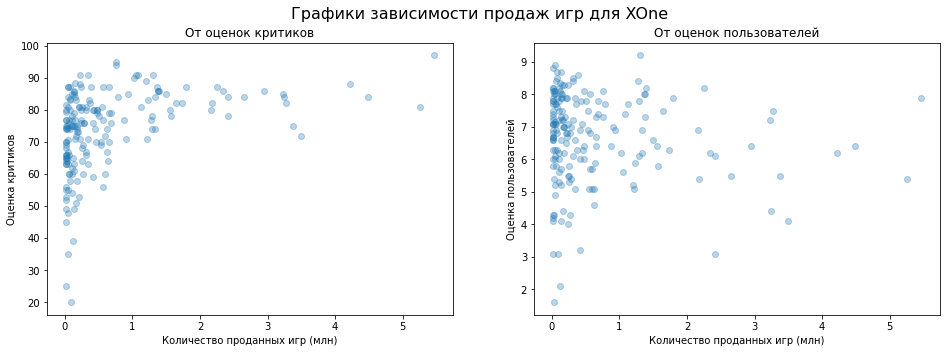

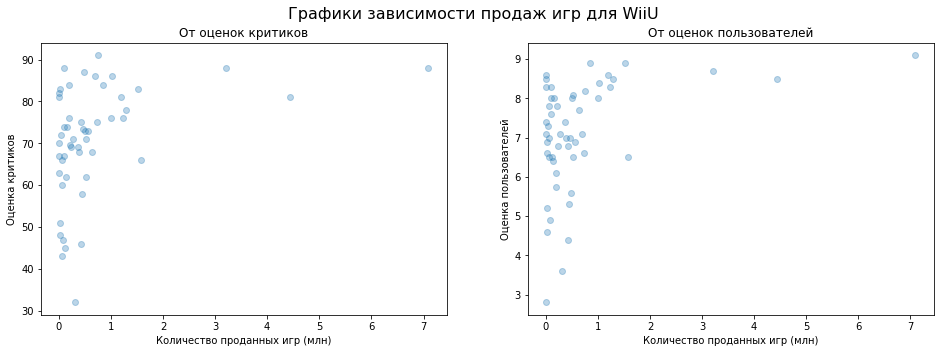

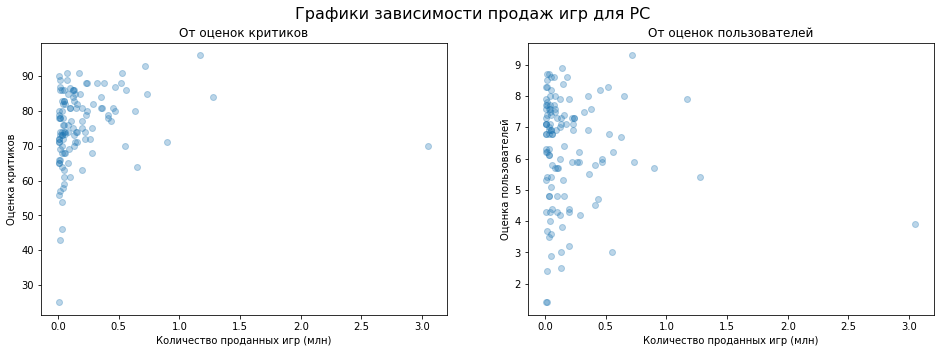

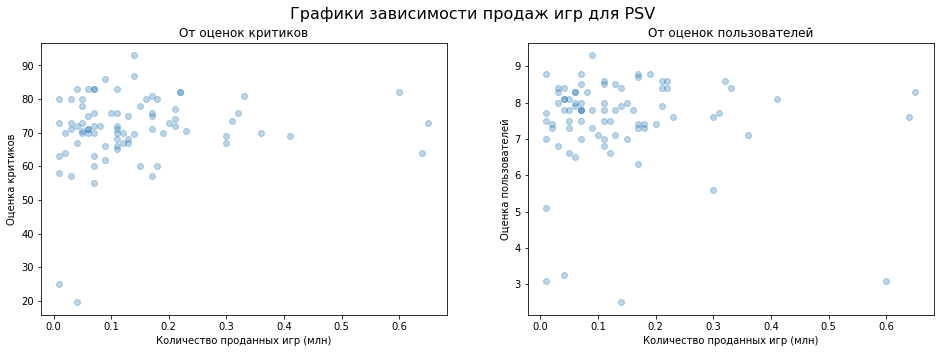

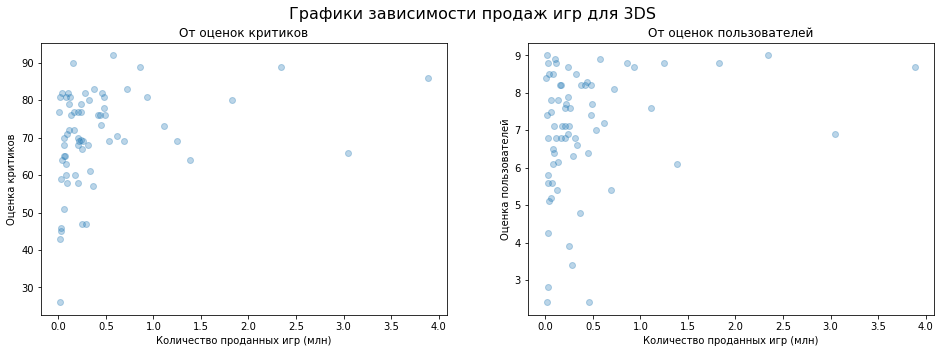


Таблица коэффициентов корреляции продаж от оценок


,PS4,XOne,WiiU,PC,PSV,3DS
Оценки критиков,0.39,0.38,0.37,0.18,0.15,0.28
Оценки пользователей,-0.03,-0.09,0.38,-0.07,-0.05,0.24


In [22]:
cs_dict = {'PS4': round(df_res_ps4["all_sales"].corr(df_res_ps4["critic_score"]), 2)} # словари
us_dict = {'PS4': round(df_res_ps4["all_sales"].corr(df_res_ps4["user_score"]), 2)} # для таблицы

for i in platforms: # цикл для построения графиков
    df_res_i = df_res_pl.query('platform == @i') # срез по платформе
        
    cs = round(df_res_i["all_sales"].corr(df_res_i["critic_score"]), 2) # коэффициент
    us = round(df_res_i["all_sales"].corr(df_res_i["user_score"]), 2) # корреляции
    cs_dict.update({i: cs}) # добавление
    us_dict.update({i: us}) # в словарь
    


    plt.figure(figsize=(16, 5)) # размер фигуры
    plt.suptitle(f'Графики зависимости продаж игр для {i}', fontsize=16)
    plt.subplot(1, 2, 1) # позиция первого графика
    plt.scatter(x=df_res_i['all_sales'], y=df_res_i['critic_score'], alpha=0.3) # первый график
    plt.xlabel('Количество проданных игр (млн)')
    plt.ylabel('Оценка критиков')
    plt.title('От оценок критиков')
    
    plt.subplot(1, 2, 2) # позиция второго графика
    plt.scatter(x=df_res_i['all_sales'], y=df_res_i['user_score'], alpha=0.3) # второй график
    plt.xlabel('Количество проданных игр (млн)')
    plt.ylabel('Оценка пользователей')
    plt.title('От оценок пользователей')
    plt.show()
    
print()
print('Таблица коэффициентов корреляции продаж от оценок')

data = [cs_dict, us_dict] # данные для таблицы
score = pd.DataFrame( # создание таблицы
    data, index=['Оценки критиков', 'Оценки пользователей'])
display(score) # вывод таблицы на экран

Отзывы критиков имеют слабое влияние на продажи игр. Для платформ **PS4**, **XOne** и **WiiU** коэффициент корреляции в среднем 0.38, для 3DS - 0.27, для других платформ - не более 0.2. Отзывы пользователей не влияют на продажи игр, коэффициент корреляции близок к нулю, за исключением одной платформы - **WiiU**, где коэффициент корреляции достигает 0.38.


### 3.7 Распределение игр по жанрам

На этом этапе выясним, что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами.

Для начала посмотрим на общее распределение игр по жанрам. 

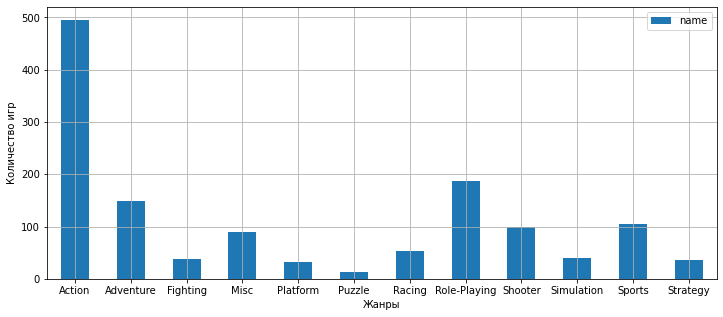

In [23]:
df_gen = df_res.groupby(['genre'])['name'].count().reset_index() # группировка по жанру

df_gen.plot.bar(                  # столбчатая
    rot=0, x='genre', y='name',   # диаграмма
    figsize=(12, 5), xlabel='Жанры',
    ylabel='Количество игр', grid=True) 
plt.show()                                                         

Несомненным лидером является жанр `Action`, на втором месте `Role-Playing`. Самыми непопулярным жанрами является `Puzzle`. Теперь посмотрим как отличаются продажи игр в зависимости от жанра. Построим столбчатую диаграмму по медианным продажам для каждого жанра.

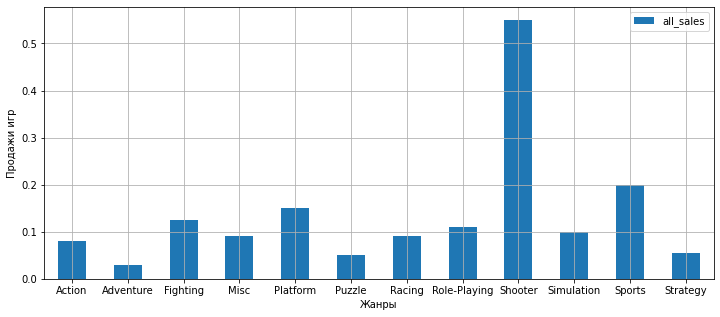

In [24]:
gen_sales = df_res.groupby(['genre'])['all_sales'].median().reset_index() # группировка по жанру

gen_sales.plot.bar(rot=0, x='genre', y='all_sales', # столбчатая
                   figsize=(12, 5), xlabel='Жанры', # диаграмма
                   ylabel='Продажи игр', grid=True) 
plt.show()

По медианным продажам лидирует жанр `Shooter`, на втором месте `Sports`. Самые низкие продажи у жанра `Adventure`. Продажи остальных жанров не сильно отличаются между собой. 

### 3.8 Вывод

Мы провели исследование и можем сделать следующие выводы:

* Большинство игр было выпущено с 1995 г. по 2016 г. 

* Жизненный цикл платформы - 10 лет, пик продаж игр на 4-6 год, далее снижение.

* Актуальным периодом было определено 3 года.

* Потенциально прибыльные платформы на 2017: PS4, XOne, WiiU, PC, PSV, 3DS.

* Отзывы критиков слабо влияют на продажи игр, отзывы пользователей не влияют совсем.

* Самый популярный жанр - `Action`, больше всего выпущенных игр. Самый непопулярный - `Puzzle`.

* Самые высокие продажи у жанра `Shooter`, самые низкие - у `Adventure`.

## 4. Портрет пользователей регионов

На данном этапе определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы.
* Самые популярные жанры.
* Влияние рейтинга ESRB на продажи в регионах.

### 4.1 Самые популярные платформы

Выявим топ-5 популярных платформы для пользователя каждого региона (NA, EU, JP). Посмотрим на различия в долях продаж по каждому региону.

In [25]:
reg_list = ['na_sales', 'eu_sales', 'jp_sales'] # список регионов

for reg in reg_list: # цикл для построения таблиц
    top = df_res.groupby(['platform'])[reg] \
    .sum().reset_index() \
    .sort_values(by=reg, ascending=False) # группировка по платформе
    top[reg] = round(top[reg] / top[reg].sum() * 100, 2)
    display(top.head())

,platform,na_sales
2,PS4,42.57
5,XOne,35.09
0,3DS,9.77
4,WiiU,8.36
1,PC,3.12


,platform,eu_sales
2,PS4,57.27
5,XOne,20.37
1,PC,7.91
0,3DS,7.10
4,WiiU,5.79


,platform,jp_sales
0,3DS,54.33
2,PS4,18.45
3,PSV,17.86
4,WiiU,8.98
5,XOne,0.39


Можно сделать вывод, что популярность платформ сильно отличается от региона. В Северной Америке(NA) лидеры **PS4** и **XOne**, в Европе(EU) на первом месте тоже **PS4**, но на втором - **PC**. В Японии(JP) самая популярная платформа - **3DS**, а **XOne** вообще не пользуется популярностью.

### 4.2 Самые популярные жанры

Посмотрим на топ-5 популярных жанров для каждого региона.

In [26]:
for reg in reg_list: # цикл для построения таблиц
    top = df_res.groupby(['genre'])[reg] \
    .sum().reset_index() \
    .sort_values(by=reg, ascending=False) # группировка по жанру
    top[reg] = round(top[reg] / top[reg].sum() * 100, 2)
    display(top.head())

,genre,na_sales
8,Shooter,28.62
0,Action,25.97
10,Sports,13.80
7,Role-Playing,12.84
2,Fighting,4.85


,genre,eu_sales
0,Action,27.96
8,Shooter,24.76
10,Sports,14.75
7,Role-Playing,11.42
6,Racing,5.69


,genre,jp_sales
7,Role-Playing,35.24
0,Action,30.35
3,Misc,6.35
2,Fighting,6.15
8,Shooter,5.17


В Северной Америке(NA) и Европе(EU) очень похожая ситуация: лидируют `Action` и `Shooter`. В Японии(JP) главный жанр `Role-Playing`, `Action` на втором месте, а `Shooter` даже не попал в топ-5.

### 4.3 Влияние рейтинга ESRB

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе. Для удобства анализа, сначала составим таблицу с расшифровкой рейтинга.

In [27]:
rating_dict = [ # список рейтингов
    ['E', 'Для всех'],
    ['E10+', 'Для всех от 10 лет и старше'],
    ['EC', 'Для детей младшего возраста'],
    ['M', 'Для взрослых'],
    ['RP', 'Рейтинг ожидается'],
    ['T', 'Подросткам'],
    ['unknown', 'Не определен']]

columns=['rating', 'definition'] 
rat_dict = pd.DataFrame(rating_dict, columns=columns) # создание таблицы

for reg in reg_list: # цикл для построения таблиц
    top = df_res.groupby(['rating'])[reg] \
    .sum().reset_index() \
    .sort_values(by=reg, ascending=False) # группировка по рейтингу
    top = top.merge(rat_dict, on='rating', how='left')
    top[reg] = round(top[reg] / top[reg].sum() * 100, 2)
    display(top)

,rating,na_sales,definition
0,M,35.50,Для взрослых
1,unknown,24.07,Не определен
2,E,16.25,Для всех
3,T,14.01,Подросткам
4,E10+,10.16,Для всех от 10 лет и старше


,rating,eu_sales,definition
0,M,36.28,Для взрослых
1,unknown,22.37,Не определен
2,E,20.21,Для всех
3,T,13.25,Подросткам
4,E10+,7.88,Для всех от 10 лет и старше


,rating,jp_sales,definition
0,unknown,61.93,Не определен
1,T,14.72,Подросткам
2,E,10.18,Для всех
3,M,7.86,Для взрослых
4,E10+,5.31,Для всех от 10 лет и старше


Рейтинг влияет на продажи в Северной Америке(NA) и Европе(EU), большинство продаж приходится на игры для взрослых(М), в Японии(JP) больше половины игр с неопределнным рейтингом, так как система ESRB определяет рейтинг для игр в США и Канаде. Для остальных игр продажи в зависимости от рейтинга не сильно отличаются. Можно сделать вывод, что рейтинг ESRB не влияет на продажи игр в Японии(JP).

### 4.4 Вывод

Пользователи Европы(EU) и Северной Америки(NA) похожи. Их самая популярная платформа - **PS4**, они предпочитают  жанры `Action` и `Shooter` и чаще выбирают игры с ретингом **М** (Для взрослых). Пользователи Японии(JP) сильно отличются, их самая популярная платформа - **3DS**, жанр `Role-Playing` и рейтинг ESRB не влияет на продажи.

## 5. Проверка гипотез

На этом этапе проверим следующие гипотезы с помощью статистического анализа:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2. Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим гипотезы с помощью t-test (статистический тест с использованием t-распределения Стьюдента), который позволяет сравнивать средние двух генеральных совокупностей между собой. В нулевой гипотезе мы предпологаем что средние равны. Пороговое значение alpha зададим 0.05.

### 5.1 Гипотеза 1

H0 - Cредние пользовательские рейтинги платформ Xbox One и PC не различаются.

H1 - Cредние пользовательские рейтинги платформ Xbox One и PC различаются.

In [28]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(df_res.dropna(subset=['user_score']).query('platform == "XOne"')['user_score'], 
                       df_res.dropna(subset=['user_score']).query('platform == "PC"')['user_score']) # t-test для двух совокупностей

print('p-значение: ', results.pvalue)

if results.pvalue < alpha: # условия для двух гипотез
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.03148460939794486
Отвергаем нулевую гипотезу


### 5.2 Гипотеза 2

H0 - Cредние пользовательские рейтинги жанров Action и Sports не различаются.

H1 - Cредние пользовательские рейтинги жанров Action и Sports различаются.

In [29]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(df_res.dropna(subset=['user_score']).query('genre == "Action"')['user_score'],
                       df_res.dropna(subset=['user_score']).query('genre == "Sports"')['user_score']) # t-test для двух совокупностей

print('p-значение: ', results.pvalue)

if results.pvalue < alpha: # условия для двух гипотез
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.1287310259769883e-13
Отвергаем нулевую гипотезу


### 5.3 Вывод

Мы проверили гипотезы с помощью t-test и можем сделать выводы:

1. Разница между средним выборки рейтинга игр для Xbox One и средним выборки рейтинга игр для PC статистически значима.
2. Разница между средним выборки рейтинга игр для жанра `Action` и средним выборки рейтинга игр для жанра `Sports` статистически значима.

## 6. Общий вывод

Задачей проекта было выявить закономерности, определяющие успешность игры. В распоряжении были данные о продажах игр до 2016 года.

После обзора данных, мы обнаружили проблемы, которые были решены на этапе подготовки данных. Было удалено не более 2% данных датасета. 

В процессе исследования были сделаны следующие выводы:
 
* Жизненный цикл платформы составляет 10 лет, пик продаж игр на 4-6 год, далее снижение.
* Актуальным для исследования периодом было определено 3 года.
* Потенциально прибыльные платформы на 2017 год: PS4, XOne, WiiU, PC, PSV, 3DS.
* Отзывы критиков слабо влияют на продажи игр, отзывы пользователей не влияют.
* Самый популярный жанр игр `Action`. Лучшие продажи у `Shooter`.

Пользователи Европы(EU) и Северной Америки(NA) похожи. Их самая популярная платформа - **PS4**, они предпочитают  жанры `Action` и `Shooter` и чаще выбирают игры с ретингом **М** (Для взрослых). Пользователи Японии(JP) сильно отличются, их самая популярная платформа - **3DS**, жанр `Role-Playing`. В Японии рейтинг не влияет на продажи.

Мы проверили гипотезы с помощью t-test и можем сделать выводы:

1. Разница между средними двух выборок (рейтинг игр для платформ Xbox One и PC) статистически значима.
1. Разница между средними двух выборок (рейтинг игр для жанров Action и Sports) статистически значима.

Исходя из проведенного исследования, магазину в своей маркетинговой политике на 2017 год рекомендуется делать основной упор на продажи игр в первую очередь для платформы **PS4**, а также для **XOne** в Европе и Северной Америке, а в Японии - для платформы **3DS**. Потенциально прибыльными платформами остаются WiiU, PC, PSV. Рекомендуется отдать приоритет жанрам `Action` и `Shooter` с ретингом **М** для в Европе и Северной Америке, а в Японии жанру `Role-Playing`. Не рекомендуется привлекать к рекламной кампании критиков, так как их оценки слабо влияют на продажи.